# How do bacterial strains deposited in NCBI change over time? 

In [1]:
#imports 
#%reset
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [8]:
my_file = "prokaryotes.txt" #hardcoded- bad! 
# reading in initial data set:
data_frame = pandas.read_csv(my_file, sep = '\t', header = 'infer', 
                             low_memory = False)

#stolen from Beth. Should make data imports etc into some functions. 
#How would we write tests for that? 
data_frame['Release Date'] = pandas.to_datetime(data_frame['Release Date'])

#set index
data_frame.index = data_frame['Release Date']

#Group by TaxID AND 
#count number of submissions every month
data_frame_grouped = data_frame.groupby("TaxID").resample("M").sum()

#also group by year
#data_frame_year = data_frame.groupby("#Organism/Name").resample("Y").count()

#data_frame_year = data_frame_year['Strain'].unstack("#Organism/Name") 

df = data_frame_grouped['TaxID'].unstack("TaxID")

##returns the rows (TaxIDs) with the largest number of entries, 
#for each year
#needs to be done before grouping. 
#top_per_year = data_frame_year.idxmax(axis=1)
top_overall = df.sum().sort_values().iloc[-15:]

## What strains are most popular each year? 

In [9]:
#Unsure how to do this. By name is susceptible to typos.
#But TaxID is inconsistent, as some organisms have multiple. 
#Does this matter? 
#top_per_year
#df
#col_order
data_frame_grouped

TaxID  Size (Mb)  Scaffolds
TaxID   Release Date                               
9       2016-11-30          9   0.456703          3
23      2016-09-30         23   4.642540         52
24      2017-05-31         24   5.110560        199
        2017-06-30          0   0.000000          0
        2017-07-31          0   0.000000          0
        2017-08-31          0   0.000000          0
        2017-09-30          0   0.000000          0
        2017-10-31          0   0.000000          0
        2017-11-30          0   0.000000          0
        2017-12-31          0   0.000000          0
        2018-01-31          0   0.000000          0
        2018-02-28          0   0.000000          0
        2018-03-31          0   0.000000          0
        2018-04-30         24   4.384460          1
33      2016-10-31         33  10.824700         42
34      2016-10-31         34   9.263970         91
41      2016-10-31         41   9.365770         61
43      2017-09-30         43  12.349700          1
48      2015-06-30         48  12.489400          1
        2015-07-31          0   0.000000          0
        2015-08-31          0   0.000000          0
        2015-09-30          0   0.000000          0
        2015-10-31          0   0.000000          0
        2015-11-30          0   0.000000          0
        2015-12-31          0   0.000000          0
        2016-01-31          0   0.000000          0
        2016-02-29          0   0.000000          0
        2016-03-31          0   0.000000          0
        2016-04-30          0   0.000000          0
        2016-05-31          0   0.000000          0
...                       ...        ...        ...
2218666 2018-06-30    2218666   7.648130          4
2219044 2018-06-30    2219044   4.370300        190
2219045 2018-06-30    2219045   4.129330        117
2219062 2018-06-30    2219062   5.198650        160
2219161 2018-06-30    2219161   4.042950        105
2219663 2018-06-30    2219663   8.432870        281
2219697 2018-06-30    2219697   4.001850         54
2219703 2018-06-30    2219703   4.231280         26
2219864 2018-07-31    2219864   4.611180         43
2230885 2018-06-30    2230885   5.823080         87
2230886 2018-06-30    2230886   4.398590         37
2233533 2018-07-31    2233533   2.737710         56
2233644 2018-06-30    2233644   2.062900         42
2233774 2018-07-31    2233774   3.204690         63
2233853 2018-05-31    2233853   7.710840        153
2233856 2018-05-31    2233856   6.706900         48
2234132 2018-07-31    2234132   8.933940        182
2234133 2018-07-31    2234133   5.409270         82
2248751 2018-07-31    2248751   2.997930        837
2249742 2018-05-31    2249742   4.618490         90
2249761 2018-07-31    2249761   3.584930         69
2249812 2018-07-31    2249812   3.715330         83
2250216 2018-07-31    2250216   3.759350        116
2250217 2018-07-31    2250217   3.699720         83
2250252 2018-07-31    2250252   3.289110          1
2250596 2018-05-31    2250596   2.217680         51
2259137 2017-04-30    2259137   5.237000         60
2259333 2018-07-31    2259333   3.872450         81
2267251 2018-06-30    2267251   5.329050        107
2268090 2018-02-28    2268090   3.875220         28

[152211 rows x 3 columns]

In [14]:
df.idxmax(axis=1)



Release Date
1995-07-31      71421
1995-10-31     243273
1995-11-30     243273
1995-12-31     243273
1996-01-31     243273
1996-02-29     243273
1996-03-31     243273
1996-04-30     243273
1996-05-31     243273
1996-06-30     243273
1996-07-31     243273
1996-08-31     243273
1996-09-30     243273
1996-10-31     243273
1996-11-30     272634
1996-12-31     243273
1997-01-31     243273
1997-02-28     243273
1997-03-31     243273
1997-04-30     243273
1997-05-31     243273
1997-06-30     243273
1997-07-31     224324
1997-08-31      85962
1997-09-30      85962
1997-10-31      85962
1997-11-30     224308
1997-12-31     224326
1998-01-31     243232
1998-02-28      85962
               ...   
2016-02-29      90370
2016-03-31      90371
2016-04-30     439334
2016-05-31    1890302
2016-06-30     875328
2016-07-31    1196095
2016-08-31    1507806
2016-09-30    1827136
2016-10-31    1911136
2016-11-30     985002
2016-12-31    1185650
2017-01-31     149539
2017-02-28      95486
2017-03-31    19621

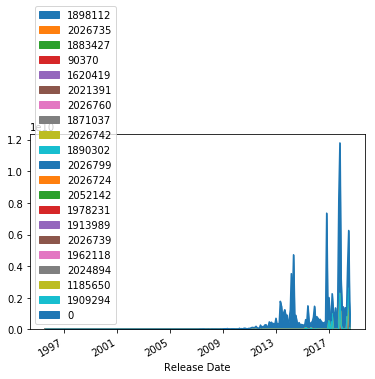

In [11]:
col_order = df.sum().sort_values(inplace=False).index
df1=np.split(df[col_order], [-20], axis=1)

#Combines these dataframes, summing all small values to combine them
final_df = pandas.concat([df1[1], df1[0].sum(axis=1)], axis=1)

#Make the plot! 
final_df.plot.area()
plt.show()
